<a href="https://colab.research.google.com/github/reyna168/Data-Analysis/blob/master/FinLab_Python_%E6%96%B0%E6%89%8B%E6%95%99%E5%AD%B8_part3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import requests
import json

def crawl_world_index():
    url = "https://finance.yahoo.com/world-indices/"
    response = requests.get(url)

    import io
    f = io.StringIO(response.text)
    dfs = pd.read_html(f)
    return dfs[0]

def crawl_price(stock_id):

    d = datetime.datetime.now()
    url = "https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=0&period2="+str(int(d.timestamp()))+"&interval=1d&events=history&=hP2rOschxO0"

    res = requests.get(url)
    data = json.loads(res.text)
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
    return df


world_index = crawl_world_index()

In [ ]:
import time

world_index_history = {}
for symbol, name in zip(world_index['Symbol'], world_index['Name']):
    
    print(name)
    
    world_index_history[name] = crawl_price(symbol)
    time.sleep(5)

S&P 500
Dow 30
Nasdaq
NYSE Composite Index
NYSE AMEX COMPOSITE INDEX
Cboe UK 100
Russell 2000
CBOE Volatility Index
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
Shenzhen Component
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index


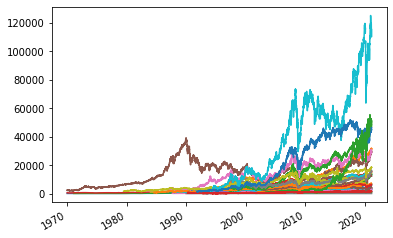

In [ ]:
for name, history in world_index_history.items():
    history.close.plot()

# Python 新手教學 part4

In [ ]:
print(world_index_history['S&P 500'].head())

                       volume       high      close  open        low
1970-01-02 14:30:00   8050000  93.540001  93.000000   0.0  91.790001
1970-01-05 14:30:00  11490000  94.250000  93.459999   0.0  92.529999
1970-01-06 14:30:00  11460000  93.809998  92.820000   0.0  92.129997
1970-01-07 14:30:00  10010000  93.379997  92.629997   0.0  91.930000
1970-01-08 14:30:00  10670000  93.470001  92.680000   0.0  91.989998


In [ ]:
close = {}
for name, price in world_index_history.items():
    if len(price) != 0:
        close[name] = price['close']

close = pd.DataFrame(close)
close = close.resample('1d').last().dropna(how='all', axis=1).dropna(how='all', axis=0)

close.head()

,S&P 500,Dow 30,Nasdaq,NYSE Composite Index,NYSE AMEX COMPOSITE INDEX,Cboe UK 100,Russell 2000,CBOE Volatility Index,FTSE 100,DAX PERFORMANCE-INDEX,CAC 40,ESTX 50 PR.EUR,EURONEXT 100,BEL 20,MOEX Russia Index,Nikkei 225,HANG SENG INDEX,SSE Composite Index,Shenzhen Component,STI Index,S&P/ASX 200,ALL ORDINARIES,S&P BSE SENSEX,Jakarta Composite Index,FTSE Bursa Malaysia KLCI,S&P/NZX 50 INDEX GROSS,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
1970-01-02,93.000000,NaN,NaN,550.890015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,93.459999,NaN,NaN,553.640015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2402.850098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,92.820000,NaN,NaN,549.830017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2406.219971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,92.629997,NaN,NaN,548.989990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2394.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,92.680000,NaN,NaN,549.409973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2283.679932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr = close.corr()
print(corr)

                            S&P 500  ...  Top 40 USD Net TRI Index
S&P 500                    1.000000  ...                 -0.034816
Dow 30                     0.993455  ...                  0.155610
Nasdaq                     0.973440  ...                 -0.136716
NYSE Composite Index       0.975833  ...                  0.544557
NYSE AMEX COMPOSITE INDEX  0.675625  ...                  0.807273
Cboe UK 100               -0.218162  ...                  0.246948
Russell 2000               0.972725  ...                  0.542306
CBOE Volatility Index     -0.065751  ...                 -0.665370
FTSE 100                   0.875736  ...                  0.704261
DAX PERFORMANCE-INDEX      0.968976  ...                  0.580213
CAC 40                     0.763470  ...                  0.619795
ESTX 50 PR.EUR             0.472677  ...                  0.691058
EURONEXT 100               0.747498  ...                  0.623144
BEL 20                     0.753323  ...                  0.83

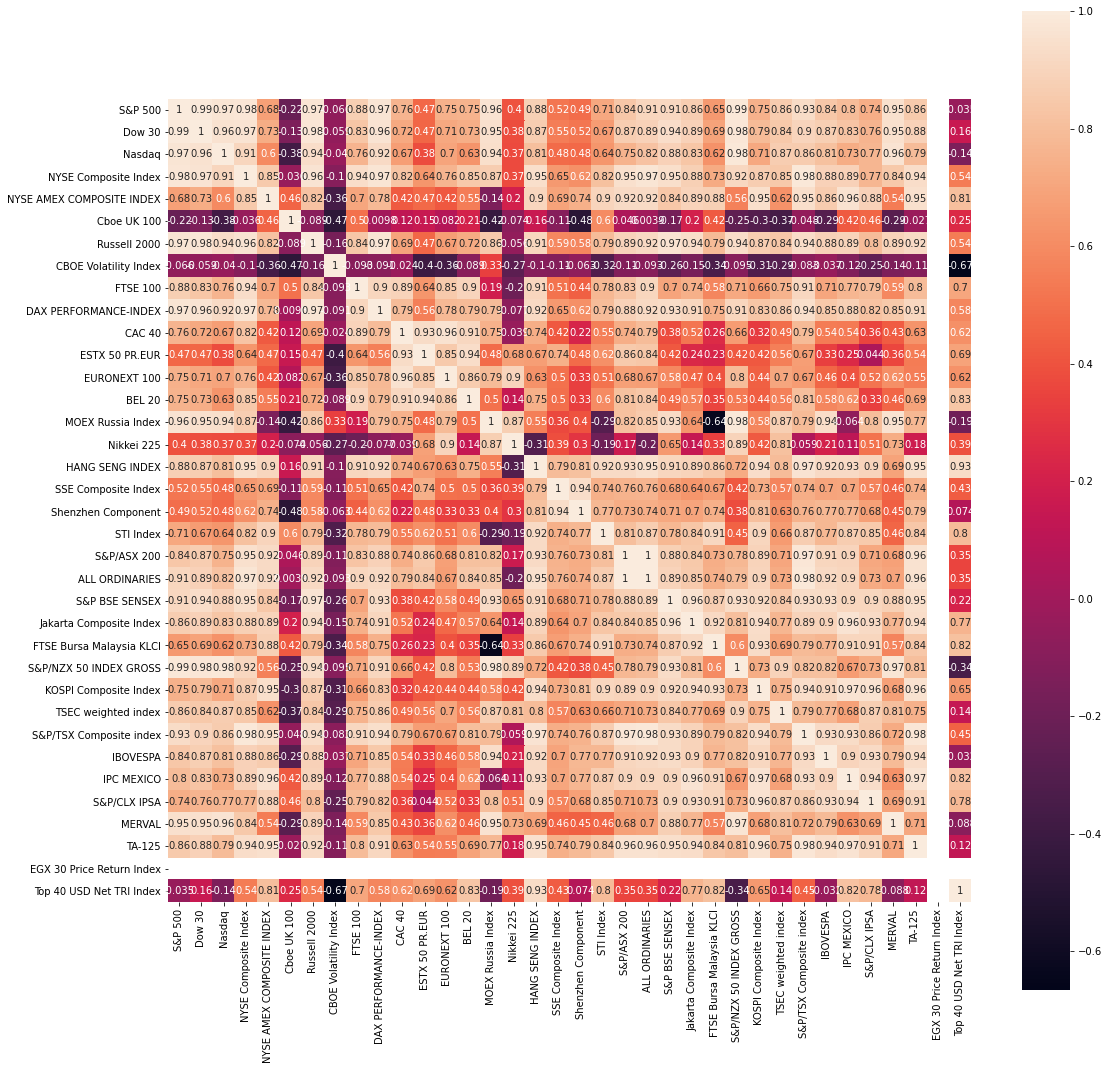

In [ ]:
# set figure size
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 18)

# original code
import seaborn as sns
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

In [ ]:
close['Cboe UK 100 Price Return']['2015':].plot()
close['TSEC weighted index']['2015':].plot()

KeyError: ignored

# FinLab Python 新手教學 part5

## 計算每日漲跌

In [ ]:
pct_change = close.pct_change()
profit = pct_change.mean()
profit.sort_values()

Cboe UK 100                 -0.000189
EGX 30 Price Return Index    0.000000
ESTX 50 PR.EUR               0.000057
EURONEXT 100                 0.000092
FTSE Bursa Malaysia KLCI     0.000119
TSEC weighted index          0.000155
BEL 20                       0.000186
STI Index                    0.000192
CAC 40                       0.000205
S&P/ASX 200                  0.000221
FTSE 100                     0.000226
S&P/TSX Composite index      0.000243
Nikkei 225                   0.000244
Top 40 USD Net TRI Index     0.000244
SSE Composite Index          0.000245
ALL ORDINARIES               0.000253
NYSE AMEX COMPOSITE INDEX    0.000263
NYSE Composite Index         0.000277
S&P/CLX IPSA                 0.000280
Shenzhen Component           0.000294
S&P 500                      0.000307
Dow 30                       0.000316
KOSPI Composite Index        0.000317
TA-125                       0.000327
Jakarta Composite Index      0.000331
Russell 2000                 0.000335
S&P/NZX 50 I

## 計算風險

In [ ]:
risk = pct_change.std()

## 計算報酬率

In [ ]:
sharpe = profit / risk * (252 ** 0.5)
sharpe.sort_values()

Cboe UK 100                 -0.158694
ESTX 50 PR.EUR               0.068741
EURONEXT 100                 0.121250
FTSE Bursa Malaysia KLCI     0.165577
TSEC weighted index          0.199356
Top 40 USD Net TRI Index     0.233174
CAC 40                       0.256435
BEL 20                       0.274376
STI Index                    0.277910
SSE Composite Index          0.280896
Shenzhen Component           0.297877
Nikkei 225                   0.319900
KOSPI Composite Index        0.326503
FTSE 100                     0.350018
HANG SENG INDEX              0.377353
S&P/ASX 200                  0.388829
NYSE AMEX COMPOSITE INDEX    0.405498
Jakarta Composite Index      0.406919
S&P/TSX Composite index      0.419902
Russell 2000                 0.429394
DAX PERFORMANCE-INDEX        0.429569
ALL ORDINARIES               0.440179
NYSE Composite Index         0.444965
TA-125                       0.453704
S&P 500                      0.478861
Dow 30                       0.487424
CBOE Volatil

## 計算 sharpe ratio

In [ ]:
sharpe = profit / risk * (252 ** 0.5)
sharpe.sort_values()

Cboe UK 100                 -0.158694
ESTX 50 PR.EUR               0.068741
EURONEXT 100                 0.121250
FTSE Bursa Malaysia KLCI     0.165577
TSEC weighted index          0.199356
Top 40 USD Net TRI Index     0.233174
CAC 40                       0.256435
BEL 20                       0.274376
STI Index                    0.277910
SSE Composite Index          0.280896
Shenzhen Component           0.297877
Nikkei 225                   0.319900
KOSPI Composite Index        0.326503
FTSE 100                     0.350018
HANG SENG INDEX              0.377353
S&P/ASX 200                  0.388829
NYSE AMEX COMPOSITE INDEX    0.405498
Jakarta Composite Index      0.406919
S&P/TSX Composite index      0.419902
Russell 2000                 0.429394
DAX PERFORMANCE-INDEX        0.429569
ALL ORDINARIES               0.440179
NYSE Composite Index         0.444965
TA-125                       0.453704
S&P 500                      0.478861
Dow 30                       0.487424
CBOE Volatil

## 移動窗格 sharpe ratio

In [ ]:
# before
profit = pct_change.mean()
risk = pct_change.std()
sharpe = profit / risk * (252 ** 0.5)

# after
profit = pct_change.rolling(252).mean()
risk = pct_change.rolling(252).std()
sharpe = profit / risk * (252 ** 0.5)

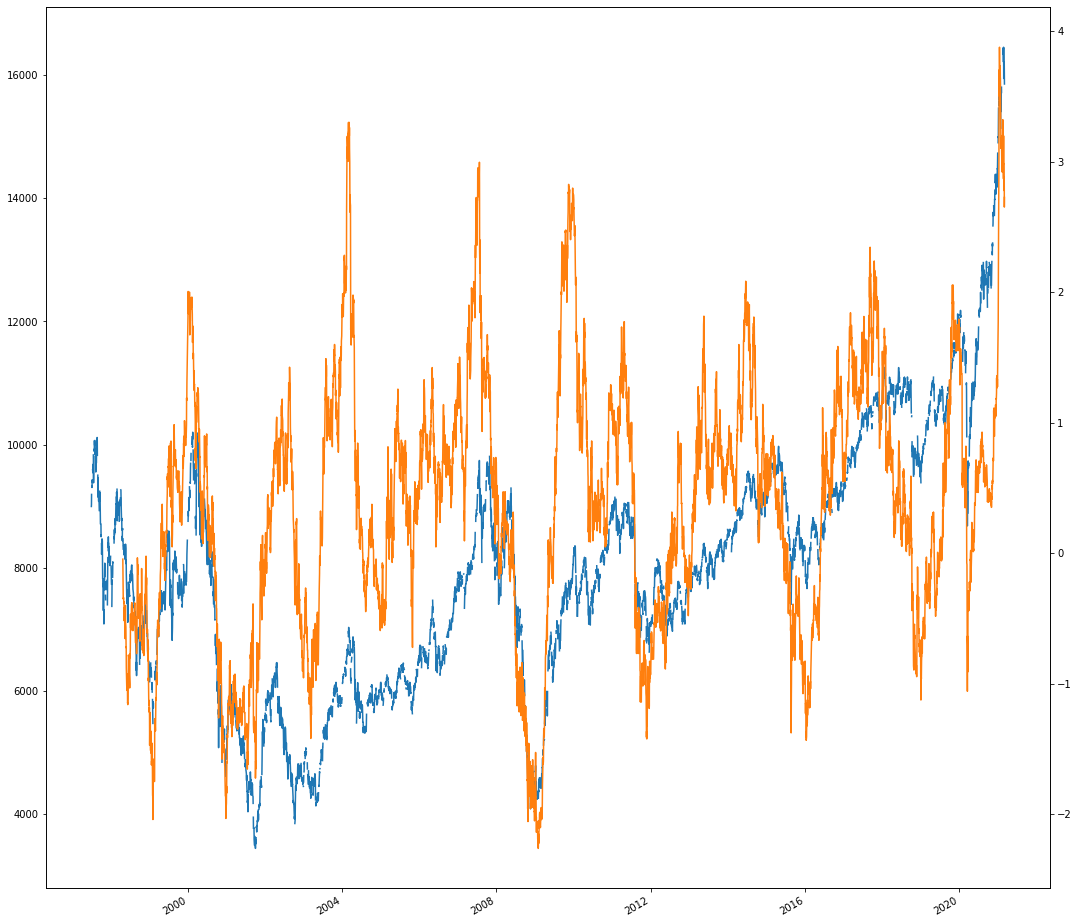

In [ ]:
close['TSEC weighted index'].plot()
sharpe['TSEC weighted index'].plot(secondary_y=True)